# 0: Challenge

Use the STL10 dataset and a pretrained ResNet 50 to demonstrate why initial layers are frozen during the first few epochs of transfer learning. Does your model do better or worse when you freeze the initial layers for the first few epochs?

# 1: Data processing
Download the STL10 tar.gz file, upzip and save under DATA_DIR. 
This is based on code from https://github.com/mttk/STL10.

In [60]:
import sys
import os, sys, tarfile, errno
import numpy as np

if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data & labels
DATA_PATH = './data/stl10_binary/'


def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)
        images = np.reshape(everything, (-1, 3, 96, 96))
        images = np.transpose(images, (0, 3, 2, 1))
        return images

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")
    
def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels, save_path):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = save_path + str(label) + '/'
        
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1

sys.version_info(major=3, minor=6, micro=13, releaselevel='final', serial=0)


In [ ]:
# do not run this cell again, as tar file has been downloaded. Running low on disk space, delete unlabel images as these are not used.
# download_and_extract()


In [61]:
# test to check if the whole dataset is read correctly
# read images from binary files
phase = 'train'
images_train = read_all_images(DATA_PATH + 'train' + '_X.bin')
labels_train = read_labels(DATA_PATH + 'train' + '_y.bin')
print(images_train.shape, labels_train.shape)
save_images(images_train, labels_train, DATA_DIR + '/train/')

phase = 'test' #note save direcotry is /val, not /test
images_test = read_all_images(DATA_PATH + 'test' + '_X.bin')
labels_test = read_labels(DATA_PATH + 'test' + '_y.bin')
print(images_test.shape, labels_test.shape)
save_images(images_test, labels_test, DATA_DIR + '/val/')  

(5000, 96, 96, 3) (5000,)
Saving images to disk
./data/train/2/0
./data/train/6/1
./data/train/2/2
./data/train/7/3
./data/train/4/4
./data/train/10/5
./data/train/8/6
./data/train/5/7
./data/train/6/8
./data/train/9/9
./data/train/1/10
./data/train/7/11
./data/train/1/12
./data/train/9/13
./data/train/8/14
./data/train/7/15
./data/train/5/16
./data/train/7/17
./data/train/3/18
./data/train/3/19
./data/train/2/20
./data/train/2/21
./data/train/7/22
./data/train/3/23
./data/train/2/24
./data/train/9/25
./data/train/6/26
./data/train/2/27
./data/train/6/28
./data/train/6/29
./data/train/1/30
./data/train/1/31
./data/train/1/32
./data/train/2/33
./data/train/4/34
./data/train/7/35
./data/train/8/36
./data/train/3/37
./data/train/2/38
./data/train/4/39
./data/train/2/40
./data/train/7/41
./data/train/2/42
./data/train/4/43
./data/train/8/44
./data/train/5/45
./data/train/4/46
./data/train/1/47
./data/train/7/48
./data/train/8/49
./data/train/7/50
./data/train/6/51
./data/train/9/52
./data/

./data/train/6/445
./data/train/9/446
./data/train/8/447
./data/train/9/448
./data/train/9/449
./data/train/6/450
./data/train/6/451
./data/train/6/452
./data/train/9/453
./data/train/8/454
./data/train/4/455
./data/train/10/456
./data/train/2/457
./data/train/10/458
./data/train/2/459
./data/train/1/460
./data/train/7/461
./data/train/4/462
./data/train/7/463
./data/train/2/464
./data/train/7/465
./data/train/1/466
./data/train/6/467
./data/train/3/468
./data/train/8/469
./data/train/8/470
./data/train/2/471
./data/train/9/472
./data/train/7/473
./data/train/8/474
./data/train/7/475
./data/train/4/476
./data/train/8/477
./data/train/1/478
./data/train/10/479
./data/train/2/480
./data/train/9/481
./data/train/6/482
./data/train/9/483
./data/train/9/484
./data/train/10/485
./data/train/5/486
./data/train/1/487
./data/train/10/488
./data/train/2/489
./data/train/6/490
./data/train/3/491
./data/train/5/492
./data/train/4/493
./data/train/8/494
./data/train/6/495
./data/train/2/496
./data/

./data/train/8/880
./data/train/6/881
./data/train/9/882
./data/train/9/883
./data/train/10/884
./data/train/1/885
./data/train/2/886
./data/train/4/887
./data/train/6/888
./data/train/8/889
./data/train/9/890
./data/train/3/891
./data/train/6/892
./data/train/4/893
./data/train/1/894
./data/train/7/895
./data/train/4/896
./data/train/9/897
./data/train/2/898
./data/train/2/899
./data/train/6/900
./data/train/2/901
./data/train/4/902
./data/train/5/903
./data/train/4/904
./data/train/6/905
./data/train/3/906
./data/train/6/907
./data/train/5/908
./data/train/9/909
./data/train/3/910
./data/train/1/911
./data/train/2/912
./data/train/2/913
./data/train/7/914
./data/train/10/915
./data/train/2/916
./data/train/9/917
./data/train/7/918
./data/train/10/919
./data/train/3/920
./data/train/4/921
./data/train/4/922
./data/train/10/923
./data/train/9/924
./data/train/2/925
./data/train/9/926
./data/train/7/927
./data/train/6/928
./data/train/2/929
./data/train/6/930
./data/train/10/931
./data/

./data/train/10/1298
./data/train/3/1299
./data/train/2/1300
./data/train/7/1301
./data/train/5/1302
./data/train/10/1303
./data/train/3/1304
./data/train/2/1305
./data/train/9/1306
./data/train/1/1307
./data/train/2/1308
./data/train/7/1309
./data/train/5/1310
./data/train/8/1311
./data/train/7/1312
./data/train/7/1313
./data/train/6/1314
./data/train/3/1315
./data/train/2/1316
./data/train/9/1317
./data/train/10/1318
./data/train/3/1319
./data/train/3/1320
./data/train/9/1321
./data/train/10/1322
./data/train/6/1323
./data/train/7/1324
./data/train/10/1325
./data/train/3/1326
./data/train/9/1327
./data/train/4/1328
./data/train/4/1329
./data/train/5/1330
./data/train/5/1331
./data/train/1/1332
./data/train/9/1333
./data/train/7/1334
./data/train/9/1335
./data/train/9/1336
./data/train/8/1337
./data/train/4/1338
./data/train/4/1339
./data/train/9/1340
./data/train/3/1341
./data/train/5/1342
./data/train/2/1343
./data/train/9/1344
./data/train/5/1345
./data/train/9/1346
./data/train/7/

./data/train/7/1710
./data/train/7/1711
./data/train/8/1712
./data/train/1/1713
./data/train/8/1714
./data/train/6/1715
./data/train/2/1716
./data/train/8/1717
./data/train/2/1718
./data/train/8/1719
./data/train/9/1720
./data/train/9/1721
./data/train/3/1722
./data/train/9/1723
./data/train/4/1724
./data/train/4/1725
./data/train/8/1726
./data/train/5/1727
./data/train/6/1728
./data/train/3/1729
./data/train/7/1730
./data/train/1/1731
./data/train/4/1732
./data/train/8/1733
./data/train/3/1734
./data/train/7/1735
./data/train/1/1736
./data/train/7/1737
./data/train/2/1738
./data/train/10/1739
./data/train/10/1740
./data/train/4/1741
./data/train/3/1742
./data/train/7/1743
./data/train/4/1744
./data/train/2/1745
./data/train/6/1746
./data/train/5/1747
./data/train/3/1748
./data/train/5/1749
./data/train/5/1750
./data/train/10/1751
./data/train/5/1752
./data/train/8/1753
./data/train/1/1754
./data/train/5/1755
./data/train/5/1756
./data/train/4/1757
./data/train/2/1758
./data/train/3/17

./data/train/6/2127
./data/train/7/2128
./data/train/3/2129
./data/train/7/2130
./data/train/5/2131
./data/train/1/2132
./data/train/3/2133
./data/train/10/2134
./data/train/1/2135
./data/train/8/2136
./data/train/5/2137
./data/train/4/2138
./data/train/7/2139
./data/train/1/2140
./data/train/4/2141
./data/train/8/2142
./data/train/8/2143
./data/train/8/2144
./data/train/10/2145
./data/train/8/2146
./data/train/9/2147
./data/train/2/2148
./data/train/3/2149
./data/train/4/2150
./data/train/9/2151
./data/train/5/2152
./data/train/4/2153
./data/train/6/2154
./data/train/1/2155
./data/train/10/2156
./data/train/3/2157
./data/train/3/2158
./data/train/9/2159
./data/train/5/2160
./data/train/1/2161
./data/train/7/2162
./data/train/2/2163
./data/train/3/2164
./data/train/3/2165
./data/train/1/2166
./data/train/10/2167
./data/train/8/2168
./data/train/5/2169
./data/train/10/2170
./data/train/9/2171
./data/train/4/2172
./data/train/2/2173
./data/train/4/2174
./data/train/9/2175
./data/train/7/

./data/train/7/2559
./data/train/7/2560
./data/train/8/2561
./data/train/1/2562
./data/train/7/2563
./data/train/7/2564
./data/train/8/2565
./data/train/9/2566
./data/train/9/2567
./data/train/4/2568
./data/train/6/2569
./data/train/7/2570
./data/train/6/2571
./data/train/1/2572
./data/train/8/2573
./data/train/10/2574
./data/train/10/2575
./data/train/9/2576
./data/train/7/2577
./data/train/1/2578
./data/train/3/2579
./data/train/9/2580
./data/train/9/2581
./data/train/3/2582
./data/train/6/2583
./data/train/3/2584
./data/train/5/2585
./data/train/5/2586
./data/train/10/2587
./data/train/1/2588
./data/train/7/2589
./data/train/1/2590
./data/train/6/2591
./data/train/5/2592
./data/train/5/2593
./data/train/5/2594
./data/train/8/2595
./data/train/8/2596
./data/train/7/2597
./data/train/2/2598
./data/train/4/2599
./data/train/4/2600
./data/train/4/2601
./data/train/10/2602
./data/train/3/2603
./data/train/6/2604
./data/train/10/2605
./data/train/8/2606
./data/train/3/2607
./data/train/8/

./data/train/7/2974
./data/train/3/2975
./data/train/6/2976
./data/train/8/2977
./data/train/1/2978
./data/train/10/2979
./data/train/9/2980
./data/train/3/2981
./data/train/3/2982
./data/train/9/2983
./data/train/7/2984
./data/train/6/2985
./data/train/6/2986
./data/train/2/2987
./data/train/8/2988
./data/train/5/2989
./data/train/6/2990
./data/train/10/2991
./data/train/9/2992
./data/train/2/2993
./data/train/4/2994
./data/train/9/2995
./data/train/8/2996
./data/train/7/2997
./data/train/4/2998
./data/train/7/2999
./data/train/7/3000
./data/train/10/3001
./data/train/3/3002
./data/train/2/3003
./data/train/2/3004
./data/train/3/3005
./data/train/9/3006
./data/train/10/3007
./data/train/8/3008
./data/train/2/3009
./data/train/10/3010
./data/train/5/3011
./data/train/1/3012
./data/train/8/3013
./data/train/2/3014
./data/train/9/3015
./data/train/2/3016
./data/train/10/3017
./data/train/5/3018
./data/train/4/3019
./data/train/10/3020
./data/train/5/3021
./data/train/1/3022
./data/train/

./data/train/5/3406
./data/train/7/3407
./data/train/7/3408
./data/train/4/3409
./data/train/9/3410
./data/train/5/3411
./data/train/4/3412
./data/train/1/3413
./data/train/6/3414
./data/train/2/3415
./data/train/4/3416
./data/train/10/3417
./data/train/9/3418
./data/train/7/3419
./data/train/7/3420
./data/train/3/3421
./data/train/5/3422
./data/train/8/3423
./data/train/1/3424
./data/train/8/3425
./data/train/2/3426
./data/train/2/3427
./data/train/4/3428
./data/train/8/3429
./data/train/10/3430
./data/train/8/3431
./data/train/1/3432
./data/train/8/3433
./data/train/3/3434
./data/train/10/3435
./data/train/1/3436
./data/train/9/3437
./data/train/1/3438
./data/train/5/3439
./data/train/5/3440
./data/train/5/3441
./data/train/8/3442
./data/train/8/3443
./data/train/10/3444
./data/train/9/3445
./data/train/3/3446
./data/train/1/3447
./data/train/7/3448
./data/train/2/3449
./data/train/3/3450
./data/train/4/3451
./data/train/2/3452
./data/train/8/3453
./data/train/10/3454
./data/train/4/

./data/train/6/3815
./data/train/5/3816
./data/train/10/3817
./data/train/9/3818
./data/train/8/3819
./data/train/2/3820
./data/train/10/3821
./data/train/1/3822
./data/train/5/3823
./data/train/9/3824
./data/train/3/3825
./data/train/8/3826
./data/train/4/3827
./data/train/6/3828
./data/train/3/3829
./data/train/7/3830
./data/train/5/3831
./data/train/9/3832
./data/train/6/3833
./data/train/2/3834
./data/train/5/3835
./data/train/8/3836
./data/train/9/3837
./data/train/10/3838
./data/train/9/3839
./data/train/1/3840
./data/train/3/3841
./data/train/8/3842
./data/train/1/3843
./data/train/8/3844
./data/train/5/3845
./data/train/8/3846
./data/train/3/3847
./data/train/1/3848
./data/train/1/3849
./data/train/4/3850
./data/train/8/3851
./data/train/1/3852
./data/train/1/3853
./data/train/7/3854
./data/train/6/3855
./data/train/7/3856
./data/train/2/3857
./data/train/4/3858
./data/train/1/3859
./data/train/9/3860
./data/train/4/3861
./data/train/7/3862
./data/train/10/3863
./data/train/4/3

./data/train/5/4241
./data/train/3/4242
./data/train/4/4243
./data/train/2/4244
./data/train/1/4245
./data/train/9/4246
./data/train/6/4247
./data/train/2/4248
./data/train/9/4249
./data/train/4/4250
./data/train/5/4251
./data/train/2/4252
./data/train/8/4253
./data/train/2/4254
./data/train/1/4255
./data/train/8/4256
./data/train/10/4257
./data/train/10/4258
./data/train/3/4259
./data/train/9/4260
./data/train/4/4261
./data/train/2/4262
./data/train/2/4263
./data/train/5/4264
./data/train/7/4265
./data/train/2/4266
./data/train/3/4267
./data/train/3/4268
./data/train/2/4269
./data/train/1/4270
./data/train/4/4271
./data/train/6/4272
./data/train/2/4273
./data/train/3/4274
./data/train/4/4275
./data/train/8/4276
./data/train/10/4277
./data/train/1/4278
./data/train/9/4279
./data/train/2/4280
./data/train/5/4281
./data/train/7/4282
./data/train/1/4283
./data/train/8/4284
./data/train/4/4285
./data/train/7/4286
./data/train/5/4287
./data/train/10/4288
./data/train/6/4289
./data/train/5/4

./data/train/8/4673
./data/train/8/4674
./data/train/6/4675
./data/train/2/4676
./data/train/9/4677
./data/train/8/4678
./data/train/7/4679
./data/train/2/4680
./data/train/10/4681
./data/train/10/4682
./data/train/10/4683
./data/train/5/4684
./data/train/4/4685
./data/train/5/4686
./data/train/1/4687
./data/train/2/4688
./data/train/6/4689
./data/train/2/4690
./data/train/5/4691
./data/train/3/4692
./data/train/9/4693
./data/train/5/4694
./data/train/1/4695
./data/train/10/4696
./data/train/9/4697
./data/train/2/4698
./data/train/5/4699
./data/train/5/4700
./data/train/9/4701
./data/train/2/4702
./data/train/9/4703
./data/train/8/4704
./data/train/10/4705
./data/train/6/4706
./data/train/3/4707
./data/train/7/4708
./data/train/2/4709
./data/train/2/4710
./data/train/5/4711
./data/train/8/4712
./data/train/2/4713
./data/train/6/4714
./data/train/3/4715
./data/train/7/4716
./data/train/6/4717
./data/train/10/4718
./data/train/9/4719
./data/train/4/4720
./data/train/2/4721
./data/train/5

./data/val/9/104
./data/val/8/105
./data/val/2/106
./data/val/3/107
./data/val/4/108
./data/val/5/109
./data/val/4/110
./data/val/3/111
./data/val/9/112
./data/val/2/113
./data/val/10/114
./data/val/1/115
./data/val/2/116
./data/val/5/117
./data/val/9/118
./data/val/2/119
./data/val/5/120
./data/val/2/121
./data/val/9/122
./data/val/6/123
./data/val/3/124
./data/val/8/125
./data/val/9/126
./data/val/4/127
./data/val/5/128
./data/val/4/129
./data/val/7/130
./data/val/10/131
./data/val/8/132
./data/val/2/133
./data/val/6/134
./data/val/4/135
./data/val/1/136
./data/val/2/137
./data/val/6/138
./data/val/8/139
./data/val/2/140
./data/val/8/141
./data/val/2/142
./data/val/5/143
./data/val/5/144
./data/val/4/145
./data/val/4/146
./data/val/10/147
./data/val/7/148
./data/val/4/149
./data/val/4/150
./data/val/9/151
./data/val/8/152
./data/val/6/153
./data/val/1/154
./data/val/2/155
./data/val/8/156
./data/val/2/157
./data/val/3/158
./data/val/9/159
./data/val/7/160
./data/val/6/161
./data/val/

./data/val/2/592
./data/val/2/593
./data/val/5/594
./data/val/8/595
./data/val/2/596
./data/val/1/597
./data/val/2/598
./data/val/7/599
./data/val/5/600
./data/val/4/601
./data/val/9/602
./data/val/10/603
./data/val/8/604
./data/val/8/605
./data/val/2/606
./data/val/7/607
./data/val/2/608
./data/val/9/609
./data/val/9/610
./data/val/9/611
./data/val/8/612
./data/val/5/613
./data/val/6/614
./data/val/4/615
./data/val/10/616
./data/val/8/617
./data/val/4/618
./data/val/6/619
./data/val/8/620
./data/val/2/621
./data/val/5/622
./data/val/6/623
./data/val/2/624
./data/val/2/625
./data/val/5/626
./data/val/5/627
./data/val/2/628
./data/val/7/629
./data/val/3/630
./data/val/3/631
./data/val/4/632
./data/val/6/633
./data/val/7/634
./data/val/8/635
./data/val/2/636
./data/val/4/637
./data/val/9/638
./data/val/3/639
./data/val/7/640
./data/val/8/641
./data/val/7/642
./data/val/6/643
./data/val/6/644
./data/val/6/645
./data/val/6/646
./data/val/6/647
./data/val/1/648
./data/val/5/649
./data/val/5

./data/val/10/1074
./data/val/5/1075
./data/val/7/1076
./data/val/7/1077
./data/val/1/1078
./data/val/9/1079
./data/val/7/1080
./data/val/2/1081
./data/val/1/1082
./data/val/8/1083
./data/val/4/1084
./data/val/5/1085
./data/val/2/1086
./data/val/8/1087
./data/val/8/1088
./data/val/4/1089
./data/val/2/1090
./data/val/9/1091
./data/val/5/1092
./data/val/9/1093
./data/val/9/1094
./data/val/6/1095
./data/val/7/1096
./data/val/1/1097
./data/val/2/1098
./data/val/2/1099
./data/val/2/1100
./data/val/8/1101
./data/val/4/1102
./data/val/7/1103
./data/val/1/1104
./data/val/9/1105
./data/val/8/1106
./data/val/7/1107
./data/val/5/1108
./data/val/2/1109
./data/val/7/1110
./data/val/5/1111
./data/val/10/1112
./data/val/5/1113
./data/val/8/1114
./data/val/2/1115
./data/val/7/1116
./data/val/9/1117
./data/val/7/1118
./data/val/9/1119
./data/val/2/1120
./data/val/7/1121
./data/val/8/1122
./data/val/1/1123
./data/val/5/1124
./data/val/2/1125
./data/val/10/1126
./data/val/4/1127
./data/val/3/1128
./data/

./data/val/1/1553
./data/val/2/1554
./data/val/7/1555
./data/val/6/1556
./data/val/8/1557
./data/val/4/1558
./data/val/6/1559
./data/val/2/1560
./data/val/7/1561
./data/val/4/1562
./data/val/4/1563
./data/val/2/1564
./data/val/6/1565
./data/val/8/1566
./data/val/1/1567
./data/val/2/1568
./data/val/9/1569
./data/val/8/1570
./data/val/2/1571
./data/val/10/1572
./data/val/4/1573
./data/val/4/1574
./data/val/1/1575
./data/val/1/1576
./data/val/7/1577
./data/val/4/1578
./data/val/8/1579
./data/val/3/1580
./data/val/6/1581
./data/val/5/1582
./data/val/2/1583
./data/val/1/1584
./data/val/10/1585
./data/val/3/1586
./data/val/4/1587
./data/val/2/1588
./data/val/4/1589
./data/val/9/1590
./data/val/2/1591
./data/val/5/1592
./data/val/8/1593
./data/val/4/1594
./data/val/8/1595
./data/val/1/1596
./data/val/9/1597
./data/val/5/1598
./data/val/10/1599
./data/val/6/1600
./data/val/8/1601
./data/val/7/1602
./data/val/3/1603
./data/val/6/1604
./data/val/5/1605
./data/val/7/1606
./data/val/8/1607
./data/

./data/val/9/2018
./data/val/6/2019
./data/val/8/2020
./data/val/5/2021
./data/val/8/2022
./data/val/2/2023
./data/val/1/2024
./data/val/1/2025
./data/val/9/2026
./data/val/1/2027
./data/val/4/2028
./data/val/7/2029
./data/val/6/2030
./data/val/4/2031
./data/val/6/2032
./data/val/3/2033
./data/val/3/2034
./data/val/9/2035
./data/val/10/2036
./data/val/8/2037
./data/val/9/2038
./data/val/9/2039
./data/val/10/2040
./data/val/6/2041
./data/val/5/2042
./data/val/1/2043
./data/val/2/2044
./data/val/4/2045
./data/val/6/2046
./data/val/9/2047
./data/val/1/2048
./data/val/5/2049
./data/val/2/2050
./data/val/6/2051
./data/val/2/2052
./data/val/2/2053
./data/val/4/2054
./data/val/9/2055
./data/val/8/2056
./data/val/10/2057
./data/val/9/2058
./data/val/9/2059
./data/val/5/2060
./data/val/6/2061
./data/val/10/2062
./data/val/8/2063
./data/val/5/2064
./data/val/10/2065
./data/val/4/2066
./data/val/7/2067
./data/val/7/2068
./data/val/4/2069
./data/val/2/2070
./data/val/7/2071
./data/val/3/2072
./dat

./data/val/7/2473
./data/val/5/2474
./data/val/10/2475
./data/val/9/2476
./data/val/6/2477
./data/val/1/2478
./data/val/1/2479
./data/val/4/2480
./data/val/9/2481
./data/val/4/2482
./data/val/6/2483
./data/val/2/2484
./data/val/7/2485
./data/val/9/2486
./data/val/9/2487
./data/val/5/2488
./data/val/9/2489
./data/val/5/2490
./data/val/7/2491
./data/val/3/2492
./data/val/1/2493
./data/val/4/2494
./data/val/5/2495
./data/val/1/2496
./data/val/2/2497
./data/val/9/2498
./data/val/6/2499
./data/val/9/2500
./data/val/8/2501
./data/val/3/2502
./data/val/3/2503
./data/val/4/2504
./data/val/4/2505
./data/val/4/2506
./data/val/6/2507
./data/val/3/2508
./data/val/10/2509
./data/val/1/2510
./data/val/3/2511
./data/val/8/2512
./data/val/7/2513
./data/val/1/2514
./data/val/4/2515
./data/val/4/2516
./data/val/5/2517
./data/val/1/2518
./data/val/2/2519
./data/val/4/2520
./data/val/5/2521
./data/val/1/2522
./data/val/2/2523
./data/val/4/2524
./data/val/5/2525
./data/val/9/2526
./data/val/2/2527
./data/v

./data/val/7/2943
./data/val/4/2944
./data/val/5/2945
./data/val/3/2946
./data/val/3/2947
./data/val/2/2948
./data/val/5/2949
./data/val/6/2950
./data/val/10/2951
./data/val/10/2952
./data/val/7/2953
./data/val/6/2954
./data/val/5/2955
./data/val/4/2956
./data/val/2/2957
./data/val/7/2958
./data/val/10/2959
./data/val/5/2960
./data/val/4/2961
./data/val/7/2962
./data/val/5/2963
./data/val/10/2964
./data/val/10/2965
./data/val/10/2966
./data/val/1/2967
./data/val/9/2968
./data/val/7/2969
./data/val/6/2970
./data/val/1/2971
./data/val/9/2972
./data/val/7/2973
./data/val/6/2974
./data/val/8/2975
./data/val/10/2976
./data/val/8/2977
./data/val/9/2978
./data/val/6/2979
./data/val/1/2980
./data/val/3/2981
./data/val/8/2982
./data/val/9/2983
./data/val/7/2984
./data/val/8/2985
./data/val/3/2986
./data/val/8/2987
./data/val/2/2988
./data/val/5/2989
./data/val/10/2990
./data/val/9/2991
./data/val/4/2992
./data/val/9/2993
./data/val/7/2994
./data/val/10/2995
./data/val/3/2996
./data/val/8/2997
.

./data/val/10/3421
./data/val/3/3422
./data/val/6/3423
./data/val/9/3424
./data/val/3/3425
./data/val/3/3426
./data/val/8/3427
./data/val/10/3428
./data/val/1/3429
./data/val/3/3430
./data/val/5/3431
./data/val/8/3432
./data/val/1/3433
./data/val/6/3434
./data/val/4/3435
./data/val/4/3436
./data/val/1/3437
./data/val/4/3438
./data/val/10/3439
./data/val/10/3440
./data/val/7/3441
./data/val/2/3442
./data/val/9/3443
./data/val/5/3444
./data/val/9/3445
./data/val/8/3446
./data/val/1/3447
./data/val/7/3448
./data/val/10/3449
./data/val/6/3450
./data/val/9/3451
./data/val/2/3452
./data/val/10/3453
./data/val/3/3454
./data/val/1/3455
./data/val/8/3456
./data/val/10/3457
./data/val/5/3458
./data/val/2/3459
./data/val/7/3460
./data/val/1/3461
./data/val/2/3462
./data/val/6/3463
./data/val/7/3464
./data/val/9/3465
./data/val/2/3466
./data/val/8/3467
./data/val/4/3468
./data/val/1/3469
./data/val/1/3470
./data/val/10/3471
./data/val/5/3472
./data/val/10/3473
./data/val/7/3474
./data/val/7/3475
.

./data/val/10/3880
./data/val/8/3881
./data/val/5/3882
./data/val/10/3883
./data/val/8/3884
./data/val/2/3885
./data/val/9/3886
./data/val/3/3887
./data/val/3/3888
./data/val/6/3889
./data/val/5/3890
./data/val/5/3891
./data/val/6/3892
./data/val/10/3893
./data/val/9/3894
./data/val/7/3895
./data/val/9/3896
./data/val/6/3897
./data/val/5/3898
./data/val/6/3899
./data/val/9/3900
./data/val/2/3901
./data/val/10/3902
./data/val/10/3903
./data/val/6/3904
./data/val/9/3905
./data/val/8/3906
./data/val/5/3907
./data/val/6/3908
./data/val/2/3909
./data/val/7/3910
./data/val/4/3911
./data/val/4/3912
./data/val/1/3913
./data/val/4/3914
./data/val/1/3915
./data/val/3/3916
./data/val/10/3917
./data/val/2/3918
./data/val/1/3919
./data/val/10/3920
./data/val/2/3921
./data/val/9/3922
./data/val/1/3923
./data/val/1/3924
./data/val/3/3925
./data/val/7/3926
./data/val/3/3927
./data/val/5/3928
./data/val/2/3929
./data/val/2/3930
./data/val/1/3931
./data/val/5/3932
./data/val/8/3933
./data/val/3/3934
./d

./data/val/7/4337
./data/val/5/4338
./data/val/3/4339
./data/val/1/4340
./data/val/7/4341
./data/val/10/4342
./data/val/9/4343
./data/val/7/4344
./data/val/2/4345
./data/val/6/4346
./data/val/7/4347
./data/val/2/4348
./data/val/5/4349
./data/val/2/4350
./data/val/10/4351
./data/val/5/4352
./data/val/6/4353
./data/val/10/4354
./data/val/9/4355
./data/val/4/4356
./data/val/9/4357
./data/val/5/4358
./data/val/3/4359
./data/val/4/4360
./data/val/2/4361
./data/val/10/4362
./data/val/3/4363
./data/val/1/4364
./data/val/3/4365
./data/val/3/4366
./data/val/9/4367
./data/val/5/4368
./data/val/7/4369
./data/val/5/4370
./data/val/8/4371
./data/val/4/4372
./data/val/8/4373
./data/val/9/4374
./data/val/1/4375
./data/val/10/4376
./data/val/2/4377
./data/val/8/4378
./data/val/5/4379
./data/val/9/4380
./data/val/8/4381
./data/val/9/4382
./data/val/4/4383
./data/val/5/4384
./data/val/1/4385
./data/val/4/4386
./data/val/2/4387
./data/val/5/4388
./data/val/3/4389
./data/val/3/4390
./data/val/9/4391
./dat

./data/val/4/4821
./data/val/7/4822
./data/val/9/4823
./data/val/10/4824
./data/val/5/4825
./data/val/7/4826
./data/val/7/4827
./data/val/2/4828
./data/val/3/4829
./data/val/6/4830
./data/val/4/4831
./data/val/4/4832
./data/val/5/4833
./data/val/8/4834
./data/val/8/4835
./data/val/2/4836
./data/val/5/4837
./data/val/6/4838
./data/val/4/4839
./data/val/3/4840
./data/val/4/4841
./data/val/9/4842
./data/val/8/4843
./data/val/9/4844
./data/val/5/4845
./data/val/6/4846
./data/val/5/4847
./data/val/1/4848
./data/val/6/4849
./data/val/6/4850
./data/val/1/4851
./data/val/3/4852
./data/val/5/4853
./data/val/10/4854
./data/val/6/4855
./data/val/4/4856
./data/val/4/4857
./data/val/4/4858
./data/val/8/4859
./data/val/4/4860
./data/val/6/4861
./data/val/6/4862
./data/val/7/4863
./data/val/8/4864
./data/val/9/4865
./data/val/7/4866
./data/val/9/4867
./data/val/3/4868
./data/val/7/4869
./data/val/6/4870
./data/val/1/4871
./data/val/7/4872
./data/val/6/4873
./data/val/5/4874
./data/val/7/4875
./data/v

./data/val/7/5285
./data/val/3/5286
./data/val/6/5287
./data/val/6/5288
./data/val/8/5289
./data/val/1/5290
./data/val/7/5291
./data/val/1/5292
./data/val/10/5293
./data/val/4/5294
./data/val/10/5295
./data/val/10/5296
./data/val/6/5297
./data/val/2/5298
./data/val/4/5299
./data/val/8/5300
./data/val/10/5301
./data/val/9/5302
./data/val/6/5303
./data/val/8/5304
./data/val/4/5305
./data/val/5/5306
./data/val/5/5307
./data/val/4/5308
./data/val/7/5309
./data/val/1/5310
./data/val/5/5311
./data/val/10/5312
./data/val/7/5313
./data/val/5/5314
./data/val/7/5315
./data/val/2/5316
./data/val/10/5317
./data/val/3/5318
./data/val/5/5319
./data/val/9/5320
./data/val/9/5321
./data/val/5/5322
./data/val/1/5323
./data/val/6/5324
./data/val/10/5325
./data/val/10/5326
./data/val/3/5327
./data/val/2/5328
./data/val/10/5329
./data/val/2/5330
./data/val/10/5331
./data/val/6/5332
./data/val/3/5333
./data/val/2/5334
./data/val/1/5335
./data/val/7/5336
./data/val/6/5337
./data/val/5/5338
./data/val/6/5339


./data/val/6/5761
./data/val/6/5762
./data/val/8/5763
./data/val/3/5764
./data/val/5/5765
./data/val/9/5766
./data/val/6/5767
./data/val/3/5768
./data/val/4/5769
./data/val/8/5770
./data/val/2/5771
./data/val/1/5772
./data/val/8/5773
./data/val/6/5774
./data/val/4/5775
./data/val/1/5776
./data/val/7/5777
./data/val/1/5778
./data/val/7/5779
./data/val/6/5780
./data/val/7/5781
./data/val/7/5782
./data/val/2/5783
./data/val/6/5784
./data/val/1/5785
./data/val/10/5786
./data/val/4/5787
./data/val/10/5788
./data/val/5/5789
./data/val/2/5790
./data/val/8/5791
./data/val/8/5792
./data/val/6/5793
./data/val/6/5794
./data/val/9/5795
./data/val/3/5796
./data/val/10/5797
./data/val/10/5798
./data/val/10/5799
./data/val/6/5800
./data/val/10/5801
./data/val/8/5802
./data/val/9/5803
./data/val/5/5804
./data/val/3/5805
./data/val/8/5806
./data/val/9/5807
./data/val/8/5808
./data/val/1/5809
./data/val/4/5810
./data/val/8/5811
./data/val/7/5812
./data/val/8/5813
./data/val/6/5814
./data/val/2/5815
./da

./data/val/7/6222
./data/val/9/6223
./data/val/6/6224
./data/val/8/6225
./data/val/9/6226
./data/val/7/6227
./data/val/4/6228
./data/val/8/6229
./data/val/1/6230
./data/val/10/6231
./data/val/8/6232
./data/val/7/6233
./data/val/9/6234
./data/val/4/6235
./data/val/1/6236
./data/val/4/6237
./data/val/7/6238
./data/val/6/6239
./data/val/6/6240
./data/val/10/6241
./data/val/7/6242
./data/val/7/6243
./data/val/3/6244
./data/val/3/6245
./data/val/4/6246
./data/val/7/6247
./data/val/10/6248
./data/val/4/6249
./data/val/7/6250
./data/val/6/6251
./data/val/1/6252
./data/val/9/6253
./data/val/8/6254
./data/val/2/6255
./data/val/10/6256
./data/val/4/6257
./data/val/5/6258
./data/val/7/6259
./data/val/4/6260
./data/val/5/6261
./data/val/5/6262
./data/val/2/6263
./data/val/3/6264
./data/val/6/6265
./data/val/7/6266
./data/val/7/6267
./data/val/3/6268
./data/val/6/6269
./data/val/8/6270
./data/val/3/6271
./data/val/1/6272
./data/val/3/6273
./data/val/9/6274
./data/val/1/6275
./data/val/6/6276
./data

./data/val/7/6693
./data/val/7/6694
./data/val/4/6695
./data/val/1/6696
./data/val/9/6697
./data/val/9/6698
./data/val/2/6699
./data/val/6/6700
./data/val/6/6701
./data/val/10/6702
./data/val/3/6703
./data/val/4/6704
./data/val/2/6705
./data/val/9/6706
./data/val/9/6707
./data/val/3/6708
./data/val/3/6709
./data/val/2/6710
./data/val/8/6711
./data/val/9/6712
./data/val/7/6713
./data/val/10/6714
./data/val/1/6715
./data/val/6/6716
./data/val/9/6717
./data/val/4/6718
./data/val/6/6719
./data/val/8/6720
./data/val/10/6721
./data/val/1/6722
./data/val/5/6723
./data/val/4/6724
./data/val/8/6725
./data/val/8/6726
./data/val/8/6727
./data/val/4/6728
./data/val/6/6729
./data/val/10/6730
./data/val/4/6731
./data/val/3/6732
./data/val/2/6733
./data/val/5/6734
./data/val/1/6735
./data/val/7/6736
./data/val/5/6737
./data/val/3/6738
./data/val/2/6739
./data/val/3/6740
./data/val/7/6741
./data/val/3/6742
./data/val/2/6743
./data/val/9/6744
./data/val/7/6745
./data/val/7/6746
./data/val/10/6747
./dat

./data/val/3/7155
./data/val/8/7156
./data/val/1/7157
./data/val/7/7158
./data/val/4/7159
./data/val/4/7160
./data/val/3/7161
./data/val/1/7162
./data/val/1/7163
./data/val/10/7164
./data/val/1/7165
./data/val/5/7166
./data/val/2/7167
./data/val/8/7168
./data/val/6/7169
./data/val/6/7170
./data/val/10/7171
./data/val/5/7172
./data/val/2/7173
./data/val/7/7174
./data/val/10/7175
./data/val/4/7176
./data/val/4/7177
./data/val/2/7178
./data/val/6/7179
./data/val/9/7180
./data/val/10/7181
./data/val/3/7182
./data/val/6/7183
./data/val/8/7184
./data/val/1/7185
./data/val/10/7186
./data/val/7/7187
./data/val/1/7188
./data/val/5/7189
./data/val/2/7190
./data/val/2/7191
./data/val/3/7192
./data/val/10/7193
./data/val/3/7194
./data/val/3/7195
./data/val/6/7196
./data/val/10/7197
./data/val/7/7198
./data/val/4/7199
./data/val/4/7200
./data/val/2/7201
./data/val/2/7202
./data/val/3/7203
./data/val/5/7204
./data/val/9/7205
./data/val/5/7206
./data/val/6/7207
./data/val/7/7208
./data/val/1/7209
./d

./data/val/2/7620
./data/val/4/7621
./data/val/7/7622
./data/val/9/7623
./data/val/1/7624
./data/val/4/7625
./data/val/2/7626
./data/val/6/7627
./data/val/3/7628
./data/val/7/7629
./data/val/7/7630
./data/val/6/7631
./data/val/3/7632
./data/val/8/7633
./data/val/1/7634
./data/val/1/7635
./data/val/6/7636
./data/val/1/7637
./data/val/6/7638
./data/val/2/7639
./data/val/7/7640
./data/val/7/7641
./data/val/5/7642
./data/val/10/7643
./data/val/6/7644
./data/val/3/7645
./data/val/3/7646
./data/val/9/7647
./data/val/4/7648
./data/val/7/7649
./data/val/3/7650
./data/val/5/7651
./data/val/6/7652
./data/val/2/7653
./data/val/10/7654
./data/val/5/7655
./data/val/5/7656
./data/val/3/7657
./data/val/1/7658
./data/val/1/7659
./data/val/8/7660
./data/val/5/7661
./data/val/7/7662
./data/val/8/7663
./data/val/5/7664
./data/val/5/7665
./data/val/10/7666
./data/val/4/7667
./data/val/7/7668
./data/val/8/7669
./data/val/7/7670
./data/val/10/7671
./data/val/6/7672
./data/val/9/7673
./data/val/1/7674
./data

# 2: Model training and testing

In [63]:
# License: BSD

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

# 2.1 Create dataloader to for model inputs

In [64]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# 2.2 Display a batch of training images

ttt torch.Size([64, 3, 224, 224]) torch.Size([64])


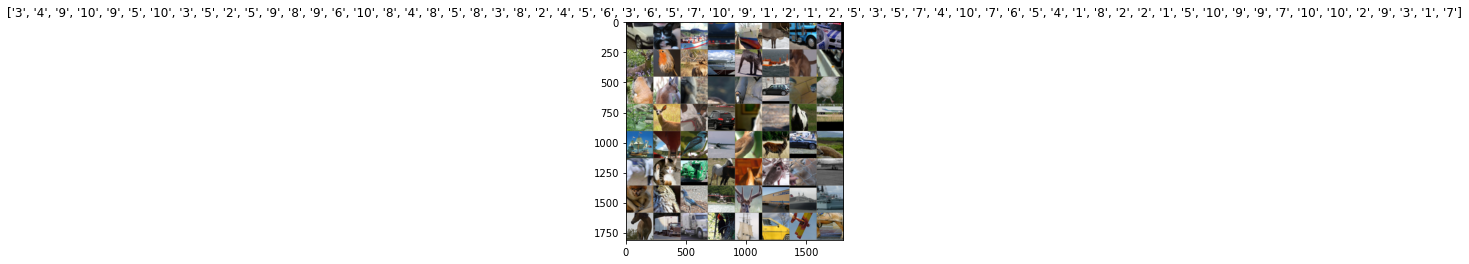

In [65]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.close()
    
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print('ttt', inputs.shape, classes.shape)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

# 2.3 Add the logic to freeze/unfreeze depending on epoch and layer


In [66]:
# train model
def train_model(model, criterion, optimizer, scheduler, run_option, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    c_names =[name for name, child in model.named_children()]
    epoch_freeze = run_option[0]  # number of epochs to freeze
    depth_unfreeze = run_option[1] # model depth from top to unfreeze, with fc as 1
    
    # empty numpy array of hold results, 4 rows
    # first column to distinguish training_loss, training_acc, val_loss, val_acc
    # second & third columns to hold run_option data
    results_data = np.empty((4, num_epochs+3))
    results_data[:, 0]= [0,1,2,3] 
    results_data[:, 1]= epoch_freeze
    results_data[:, 2]= depth_unfreeze

    for epoch in range(num_epochs):
        et = time.time()
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # based on run_option to set which epoch & which layer to freeze/unfreeze
        if epoch < epoch_freeze:
            
            for name, child in model.named_children():
                if name in c_names[-1:]:
                    for param in child.parameters():
                        param.requires_grad = True
                else:
                    for param in child.parameters():
                        param.requires_grad = False
                
        else:
            
            for name, child in model.named_children():
                if name in c_names[-depth_unfreeze:]:
                    for param in child.parameters():
                        param.requires_grad = True
                
                else:
                    for param in child.parameters():
                        param.requires_grad = False
                
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            print('epoch time ', time.time()-et)

            if phase == 'train':
                results_data[0, epoch+3] = epoch_loss
                results_data[1, epoch+3] = epoch_acc
            else:
                results_data[2, epoch+3] = epoch_loss
                results_data[3, epoch+3] = epoch_acc

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
       
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return (model, results_data)
    
# visualize model output

def visualize_model(model):
    num_images=6
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

# 2.5 load the pretrained resnet50 model
Replace the fully connected layer, then run model for under different configuations as desired.

In [47]:
# Resnet50 model has 10 named_children shown below from bottom to top 
#['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer2', 'layer3', 'layer4', 'avgpool', 'fc']
# some named_children (relu, maxpool, avgpool) do not have trainable parameters

# train and eval with the following run_options, 

# use a tuple consisting of 2 arguments to select how the model should be run
# first argument represent the number of epochs to freeze
# second argument represent the number of named_children to unfreeze from top

# I first did 17 runs for 5 epochs
# (num_epoch, 1): use as feature extractor, ie, unfreeze the FC layer which is the first named_child from top
# (0, 10): finetuning, ie, unfreeze for every epoch and for entire model
# (1,10), (2,10), (3,10): freeze for 1,2,3 epochs before unfreeze entire model
# (1,3), (1,4), (1,5), (1,6): freezing model for 1 epoch, then unfreeze from FC layer to n named_child below
# (2,3), (2,4), (2,5), (2,6): freezing model for 2 epochs, then unfreeze from FC layer to n named_child below
# (3,3), (3,4), (3,5), (3,6): freezing model for 3 epochs, then unfreeze from FC layer to n named_child below
# (please note that 'avgpool' has no trainable parameters, hence skipped)

# Then I did 4 runs for 15 epochs, consisting of 3 highest performaing configuation and finetuning, 

run_option_matrix = []

'''
num_epochs = 5
run_option_matrix = [(num_epochs,1),
                    (0,10), (1,10), (2,10), (3,10),
                    (1,3), (1,4), (1,5), (1,6),
                    (2,3), (2,4), (2,5), (2,6),
                    (3,3), (3,4), (3,5), (3,6)]

num_epochs = 15
run_option_matrix = [(1,5),(1,6), (2,6), (0,10)]
'''

f = open(r'./plot_data.csv', 'a')

for i in range(len(run_option_matrix)):
        
    model_ft = models.resnet50(pretrained=True)

    # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Linear(num_ftrs, 10)

    model_ft = model_ft.to(device)

    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    #optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
    optimizer_ft = optim.SGD(filter(lambda p: p.requires_grad, model_ft.parameters()), lr=0.001, momentum=0.9)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    run_option = run_option_matrix[i]
    print('currently on run_option ', run_option)

    model_ft_done, result_data =train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, run_option, num_epochs)
    
    np.savetxt(f, result_data, delimiter=",")

f.close()

currently on run_option  (1, 5)
Epoch 0/14
----------
train Loss: 1.4970 Acc: 0.6316
epoch time  44.446659564971924
val Loss: 0.6874 Acc: 0.9269
epoch time  114.87917280197144

Epoch 1/14
----------
train Loss: 0.5742 Acc: 0.8654
epoch time  92.3976137638092
val Loss: 0.1750 Acc: 0.9599
epoch time  163.0130066871643

Epoch 2/14
----------
train Loss: 0.3465 Acc: 0.8920
epoch time  92.23383712768555
val Loss: 0.1230 Acc: 0.9686
epoch time  162.79037928581238

Epoch 3/14
----------
train Loss: 0.3020 Acc: 0.9022
epoch time  92.26503944396973
val Loss: 0.1041 Acc: 0.9731
epoch time  162.8494153022766

Epoch 4/14
----------
train Loss: 0.2602 Acc: 0.9144
epoch time  92.2203779220581
val Loss: 0.0936 Acc: 0.9730
epoch time  163.05762434005737

Epoch 5/14
----------
train Loss: 0.2469 Acc: 0.9196
epoch time  92.42024374008179
val Loss: 0.0911 Acc: 0.9744
epoch time  163.3389914035797

Epoch 6/14
----------
train Loss: 0.2257 Acc: 0.9260
epoch time  92.23739528656006
val Loss: 0.0907 Acc: 0.9

train Loss: 0.1905 Acc: 0.9338
epoch time  114.2003128528595
val Loss: 0.0832 Acc: 0.9761
epoch time  186.85716724395752

Epoch 11/14
----------
train Loss: 0.1891 Acc: 0.9362
epoch time  114.19333839416504
val Loss: 0.0821 Acc: 0.9758
epoch time  186.77406811714172

Epoch 12/14
----------
train Loss: 0.1936 Acc: 0.9350
epoch time  114.21795463562012
val Loss: 0.0835 Acc: 0.9744
epoch time  186.81367897987366

Epoch 13/14
----------
train Loss: 0.1864 Acc: 0.9378
epoch time  114.85764598846436
val Loss: 0.0839 Acc: 0.9755
epoch time  187.60899829864502

Epoch 14/14
----------
train Loss: 0.1931 Acc: 0.9342
epoch time  114.3201379776001
val Loss: 0.0823 Acc: 0.9760
epoch time  186.91200971603394

Training complete in 46m 45s
Best val Acc: 0.976125


# 2.5 Plot results 

In [53]:
# function to generate summary plots for the run

def data_plot(data, period, title):
    
    plt.figure(figsize=(10,5))
    
    l_label=['training_loss', 'training_acc', 'val_loss', 'val_acc']
    lines = [plt.plot(d[3:], label="({}, freeze {} epochs, unfreeze depth of {})".format(l_label[int(d[0])], int(d[1]), int(d[2]))) for d in data]
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.xlim(0, period-1)
    #plt.ylim(0.92, .98)
    
    plt.title(title)
    plt.xlabel('epoch')
    plt.show()

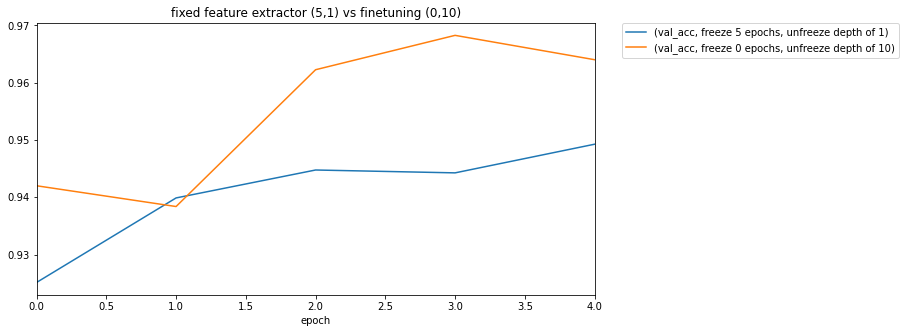

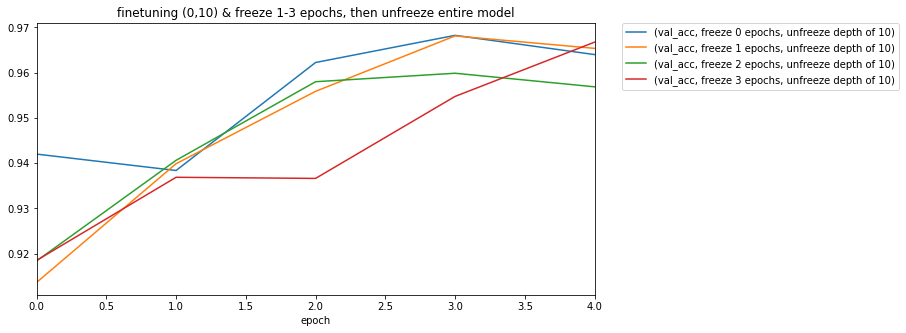

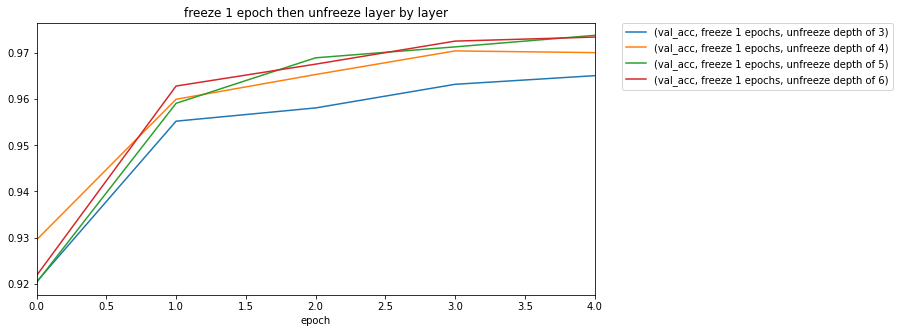

In [57]:
#read from csv file with data from past runs

# plot_data_1 contains 5 epochs of following 17 configuations  
# (num_epochs,1),
# (0,10), (1,10), (2,10), (3,10),
# (1,3), (1,4), (1,5), (1,6)
# (2,3), (2,4), (2,5), (2,6),
# (3,3), (3,4), (3,5), (3,6)

plot_data_1 = np.genfromtxt(r'./plot_data_1.csv', delimiter=',', dtype=None)

# plot_data_2 contains 15 epochs of following 4 configuations  
# (1,5),(1,6),(2,6), (0,10)                  
plot_data_2 = np.genfromtxt(r'./plot_data_2.csv', delimiter=',', dtype=None)

#each run generate 4 rows of data. Data type can be identified by column 0: (0 training_loss, 1 training_acc, 2 val_loss, 3 val_acc)
#each run option can be identified by entries in column 1 (epoch to freeze) and column 2 (layers to unfreeze)

# k is a list containing rows of interest, use numpy slice to get rows and pass rows along with applicable title

# training and val acc plot
k=[3, 7]
plot_title= 'fixed feature extractor (5,1) vs finetuning (0,10)'
data_plot(plot_data_1[k,:], 5, plot_title)

# training and val acc plot
k=[7,11,15,19]
plot_title = 'finetuning (0,10) & freeze 1-3 epochs, then unfreeze entire model'
data_plot(plot_data_1[k,:], 5, plot_title)

# training and val acc plot
k=[23,27,31,35]
plot_title = 'freeze 1 epoch then unfreeze layer by layer'
data_plot(plot_data_1[k,:], 5, plot_title)

First plot shows performance of feature extraction vs finetuning. Finetuning achieves better performance.
Second plot shows performance of finetuning along side of configuations of freezing for 1,2,3 epochs. 
Third plot shows freezing one epoch, then unfreeze various layers. Some configurations show better performance than finetuning.

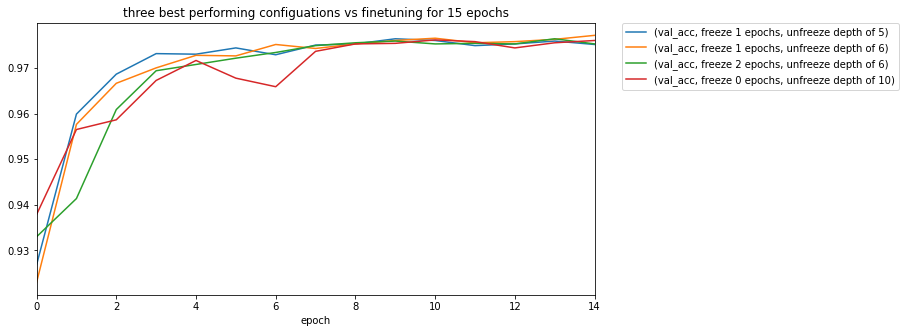

In [58]:
# training and val acc plot
k=[3,7,11,15]
plot_title = 'three best performing configuations vs finetuning for 15 epochs'
data_plot(plot_data_2[k,:], 15, plot_title)


This plots shows three best performing configurations and their performance against finetuning over 15 epochs. These configuations can achieve peak performance comparable to finetuning, but with less computational time.

These configuations are freezing 1 or 2 epochs and then unfreeze to depth of 5 or 6, which corresponds to 'layer 2' and 'layer1' of resnet50 named_children. (I am counting this from 'fc' as the top layer, and going progressively lower into the model) 

['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer2', 'layer3', 'layer4', 'avgpool', 'fc']

# 3.0 Summary

Several configuations of freezing first few epochs before unfreezing showed better peformance than the default finetuning method.

The test dataset STL10 is derived from the Imagenet, hence there are considerable similarities. The pretrained model should be able to offer pretty good performance out of box. Hence, during transfer learning, by freezing the initial epochs, pretrained model weights can be retained without being affected by the large back propogation at the beginning. This helps the model to convege to peak performance in shorter period of time.